# **IMPORTADO DE MÓDULOS/FUNCIONES**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

from functions import normalize_by_max, simpsons_rule_array

# **LOAD PULSES**

In [2]:
dir = 'Pulsos15CM20250130_version2/'
data = np.fromfile(os.path.join(dir,'coin-pulses-pos5-15cm_3001.dat'), dtype = np.float32)
print(data.shape)
Nt2 = 931
Nev = 300000
Nc = 2
data = data.reshape((Nev,Nt2,Nc))
print(data.shape)

(558600000,)
(300000, 931, 2)


# **CALIBRATE**

In [3]:
# Calculate energies
energy_dec0 = simpsons_rule_array(data[:,:,0],1) 
energy_dec1 = simpsons_rule_array(data[:,:,1],1)

In [4]:
# Photopeak energies
gamma_energy = 511

# bins
nbins = 500
# Calculate Calibration factors
histogE, binsE = np.histogram(energy_dec0, bins = nbins, range = [0,200]);
index_gamma_dec0 = find_peaks(histogE, height = 6500)[0][-1]
pos_gamma_dec0 = (binsE[index_gamma_dec0 + 1] + binsE[index_gamma_dec0])/2
m_dec0 = gamma_energy/pos_gamma_dec0
calibrado_dec0 = m_dec0*energy_dec0   # Linear calibration


histogE, binsE = np.histogram(energy_dec1, bins = nbins, range = [0,200]);
index_gamma_dec1 = find_peaks(histogE, height = 6500)[0][-1]
pos_gamma_dec1 = (binsE[index_gamma_dec1 + 1] + binsE[index_gamma_dec1])/2
m_dec1 = gamma_energy/pos_gamma_dec1
calibrado_dec1 = m_dec1*energy_dec1

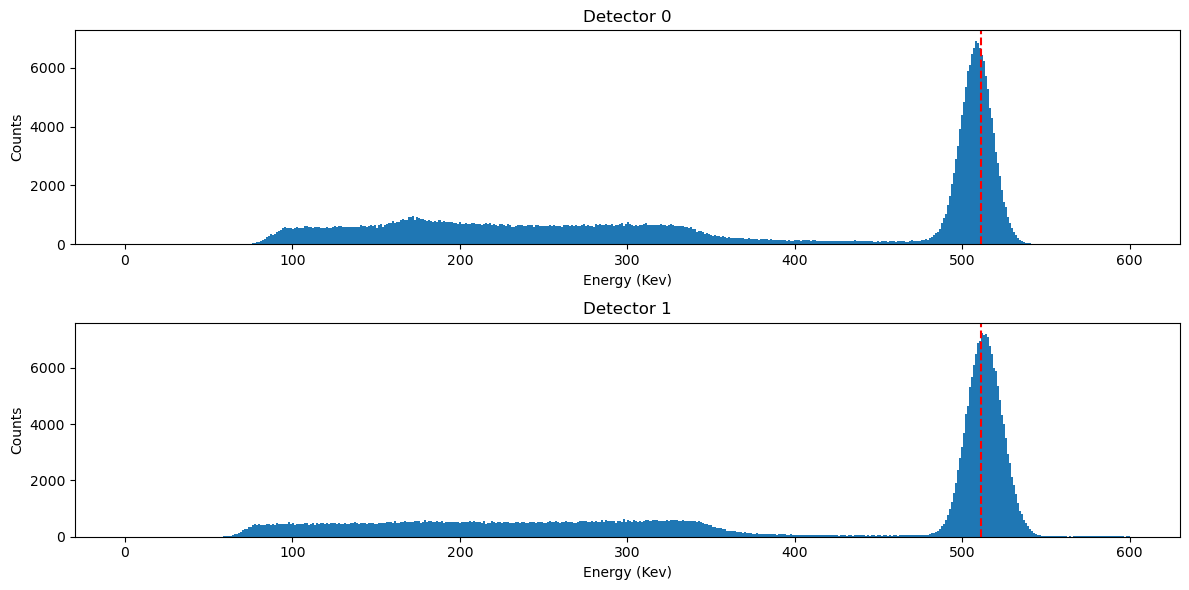

In [5]:
# Plot spectra
plt.figure(figsize = (12,6))
plt.subplot(211)
plt.hist(calibrado_dec0, bins = nbins, range = [0,600]);
plt.axvline(x = 511, color = 'r', linestyle = '--')
plt.xlabel('Energy (Kev)')
plt.ylabel('Counts')
plt.title('Detector 0')

plt.subplot(212)
plt.hist(calibrado_dec1, bins = nbins, range = [0,600]);
plt.axvline(x = 511, color = 'r', linestyle = '--')
plt.xlabel('Energy (Kev)')
plt.ylabel('Counts')
plt.title('Detector 1')

plt.tight_layout() # Prevent titles from superposing

# **ENERGY FILTERING**

In [6]:
# Define energy gates
gate_min_dec0 = 490
gate_max_dec0 = 525
gate_min_dec1 = 490
gate_max_dec1 = 525

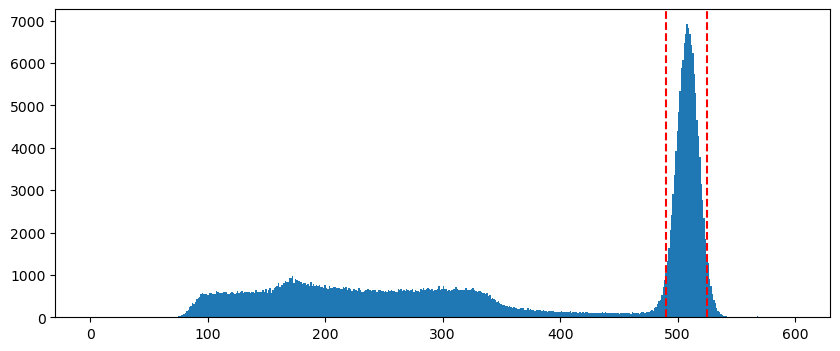

In [7]:
plt.figure(figsize = (10,4))
plt.hist(calibrado_dec0, bins = nbins, range = [0,600]);
plt.axvline(x = gate_min_dec0, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec0, color = 'r', linestyle = '--')

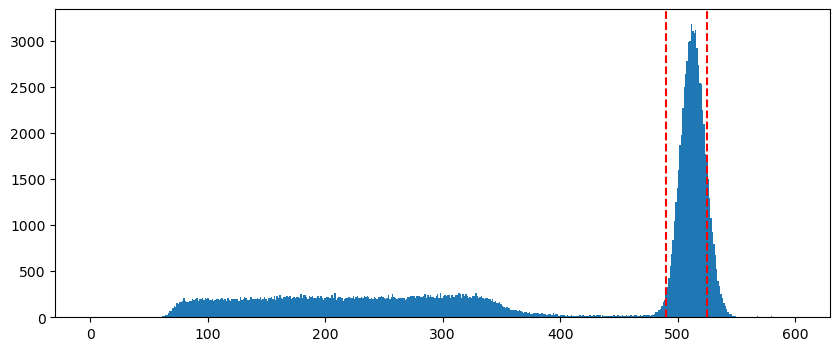

In [8]:
calibrado_dec1_filt = calibrado_dec1[(calibrado_dec0 > gate_min_dec0)  & (calibrado_dec0 < gate_max_dec0)]

plt.figure(figsize = (10,4))
plt.hist(calibrado_dec1_filt, bins = nbins, range = [0,600])
plt.axvline(x = gate_min_dec1, color = 'r', linestyle = '--')
plt.axvline(x = gate_max_dec1, color = 'r', linestyle = '--')

# **NORMALIZE**

In [9]:
data_filt = data[(calibrado_dec0 > gate_min_dec0)  & (calibrado_dec0 < gate_max_dec0),:,:]
data_filt = data_filt[(calibrado_dec1_filt  > gate_min_dec1)  & (calibrado_dec1_filt < gate_max_dec1),:,:]

print(data_filt.shape)
#------------------------------------------------------- Normalizar Pulsos ------------------------------------------------------------------------------------
data_filt_norm = normalize_by_max(data_filt, fit_polynomial = True)

(58658, 931, 2)


# **CHECK FOR OUTLIERS**

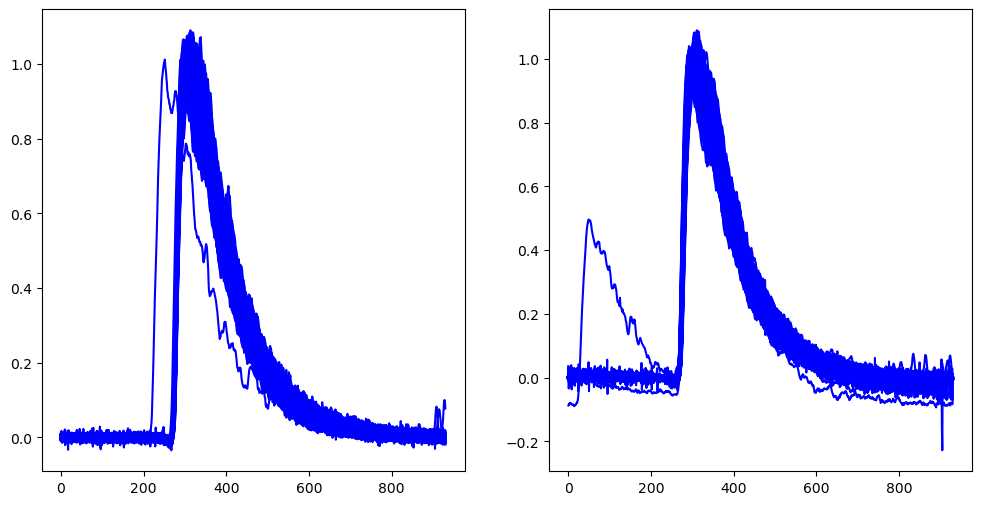

In [10]:
# Con el plot se ve si hay algún pulso que empiece mal/que no cuadre con el otro detector
plt.figure(figsize = (12,6))
#for i in range(data_filt_norm.shape[0]):
for i in range(1000):
  plt.subplot(121)
  plt.plot(data_filt_norm[i,:,0], 'b-')
  plt.subplot(122)
  plt.plot(data_filt_norm[i,:,1], 'b-')

In [11]:
#np.savez_compressed(os.path.join(dir, 'pulsoNa22:filt_norm.npz'), data = data_filt_norm)